# Random forest

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

In [21]:
clean_data = pd.read_csv("clean_data.csv", encoding="latin1")

clean_data = clean_data.rename(columns={
    "ï»¿Kraj": "Kraj"
})

clean_data['Gini'] = clean_data['Gini']/100

# Gini

In [22]:
# Kopia robocza
data = clean_data.copy()

# Logarytm PKB per capita
data['ln_PKB_pc'] = np.log(data['PKB_pc'])

# Zmienna objaśniana
y = data['Gini']

# Zmienne objaśniające
X = data[
    [
        'Stopa_bezrobocia',
        'Edukacja',
        'Zdrowie',
        'Dlugosc_zycia',
        'Inflacja',
        'ln_PKB_pc',
        'Wspolczynnik_urbanizacji',
        'Skolaryzacja',
        'Rolnictwo',
        'Dzieci_0-14'
    ]
]

# Grupy do walidacji (kraje)
groups = data['Kraj']

rf_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('rf', RandomForestRegressor(
            n_estimators=500,
            max_depth=None,
            min_samples_leaf=5,
            random_state=42,
            n_jobs=-1
        ))
    ]
)


gkf = GroupKFold(n_splits=5)

cv_mse = -cross_val_score(
    rf_pipeline,
    X,
    y,
    cv=gkf,
    groups=groups,
    scoring='neg_mean_squared_error'
)

print(f"Średni RMSE (CV): {np.sqrt(cv_mse.mean()):.3f}")

rf_pipeline.fit(X, y)

importances = rf_pipeline.named_steps['rf'].feature_importances_

feature_importance = pd.Series(
    importances,
    index=X.columns
).sort_values(ascending=False)

print(feature_importance)

Średni RMSE (CV): 0.061
Dzieci_0-14                 0.494882
Wspolczynnik_urbanizacji    0.092574
Rolnictwo                   0.079692
Zdrowie                     0.069319
ln_PKB_pc                   0.066272
Skolaryzacja                0.049532
Stopa_bezrobocia            0.040549
Dlugosc_zycia               0.040451
Edukacja                    0.035933
Inflacja                    0.030796
dtype: float64


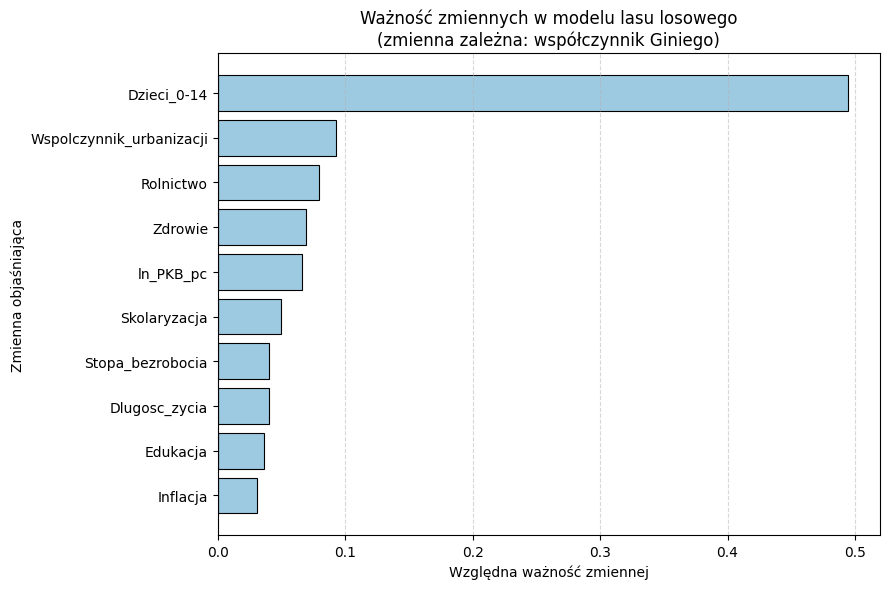

In [23]:
# Sortowanie rosnąco (najważniejsze na górze)
fi = feature_importance.sort_values(ascending=True)

plt.figure(figsize=(9, 6))

plt.barh(
    fi.index,
    fi.values,
    color='#9ecae1',
    edgecolor='black',
    linewidth=0.8
)

plt.xlabel("Względna ważność zmiennej")
plt.ylabel("Zmienna objaśniająca")
plt.title(
    "Ważność zmiennych w modelu lasu losowego\n(zmienna zależna: współczynnik Giniego)",
)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# indeks nierównosci

In [24]:
# Zmienna objaśniana
y = data['Indeks_nierow']

# Zmienne objaśniające
X = data[
    [
        'Stopa_bezrobocia',
        'Edukacja',
        'Zdrowie',
        'Dlugosc_zycia',
        'Inflacja',
        'ln_PKB_pc',
        'Wspolczynnik_urbanizacji',
        'Skolaryzacja',
        'Rolnictwo',
        'Dzieci_0-14'
    ]
]

# Grupy do walidacji (kraje)
groups = data['Kraj']

rf_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('rf', RandomForestRegressor(
            n_estimators=500,
            max_depth=None,
            min_samples_leaf=5,
            random_state=42,
            n_jobs=-1
        ))
    ]
)


gkf = GroupKFold(n_splits=5)

cv_mse = -cross_val_score(
    rf_pipeline,
    X,
    y,
    cv=gkf,
    groups=groups,
    scoring='neg_mean_squared_error'
)

print(f"Średni RMSE (CV): {np.sqrt(cv_mse.mean()):.3f}")

rf_pipeline.fit(X, y)

importances = rf_pipeline.named_steps['rf'].feature_importances_

feature_importance = pd.Series(
    importances,
    index=X.columns
).sort_values(ascending=False)

print(feature_importance)

Średni RMSE (CV): 0.769
Dzieci_0-14                 0.411865
Wspolczynnik_urbanizacji    0.143033
ln_PKB_pc                   0.140345
Zdrowie                     0.068208
Rolnictwo                   0.064948
Skolaryzacja                0.062417
Stopa_bezrobocia            0.034012
Dlugosc_zycia               0.031899
Edukacja                    0.022641
Inflacja                    0.020633
dtype: float64


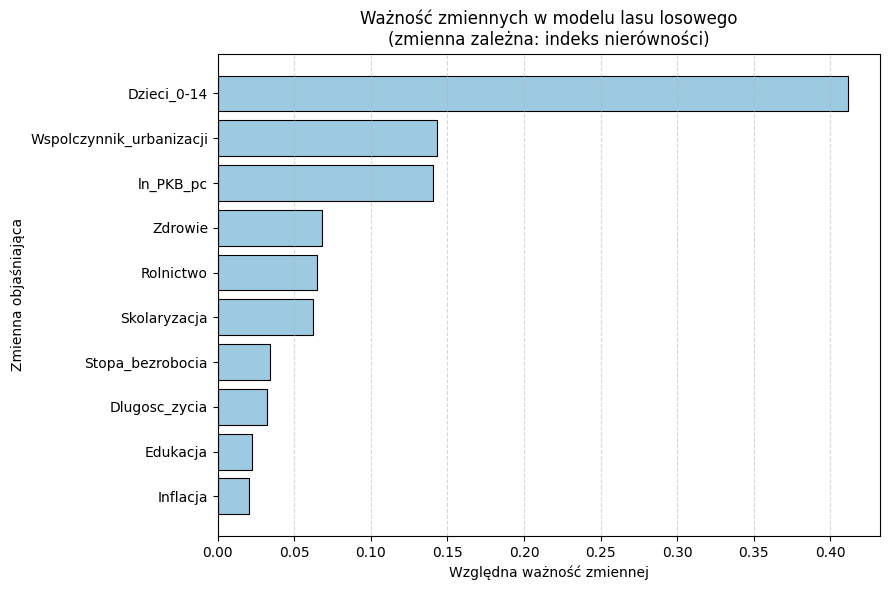

In [25]:
fi = feature_importance.sort_values(ascending=True)

plt.figure(figsize=(9, 6))

plt.barh(
    fi.index,
    fi.values,
    color='#9ecae1',
    edgecolor='black',
    linewidth=0.8
)

plt.xlabel("Względna ważność zmiennej")
plt.ylabel("Zmienna objaśniająca")
plt.title(
    "Ważność zmiennych w modelu lasu losowego\n(zmienna zależna: indeks nierówności)"
)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
